In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install datafold

In [1]:
import sys
sys.path.append('/content/drive/MyDrive/mlcms')
import Diffusion_Map

In [2]:
from Diffusion_Map import *
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
import mpl_toolkits.mplot3d.axes3d as Axes3D
from sklearn import datasets, manifold
from sklearn.datasets import make_swiss_roll

In [4]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

bonus Task

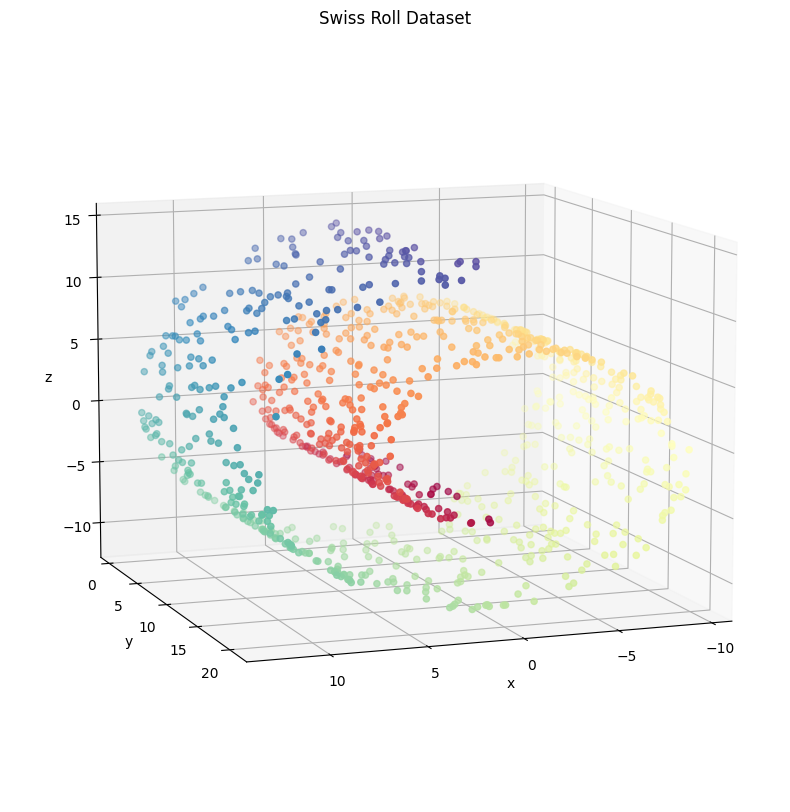

In [5]:
#---Generate Swiss roll data set and plot---

nr_samples = 5000 #how many in the data
rng = np.random.default_rng(1) #for stable
nr_samples_plot = 1000 #how many in the plot
idx_plot = rng.permutation(nr_samples)[0:nr_samples_plot] #selecting samples
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Swiss Roll Dataset")
ax.view_init(10, 70)
plt.show()
fig.savefig("/content/drive/My Drive/mlcms/swiss_roll.png")

In [6]:
#manifold
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.6386222356580965, cut-off=3.4298478565450843


In [15]:
from datafold.dynfold import DiffusionMaps
from datafold.pcfold import kernels
dmap = DiffusionMaps(kernel=kernels.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
                     n_eigenpairs=6,
                     alpha=1.0)
dmap = dmap.fit_transform(X)


In [10]:
L = 10  # Compute more dimensions initially
eigenvalues, eigenvectors = diffusion_map(X, L, X_pcm.kernel.epsilon)

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{0}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{2}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{3}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{4}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{5}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{6}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{7}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{8}$'}>],
        [<Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{9}$'}>,
         <Axes: title={'center': '$\\Psi_{1}$ vs. $\\Psi_{10}$'}>]],
       dtype=object))

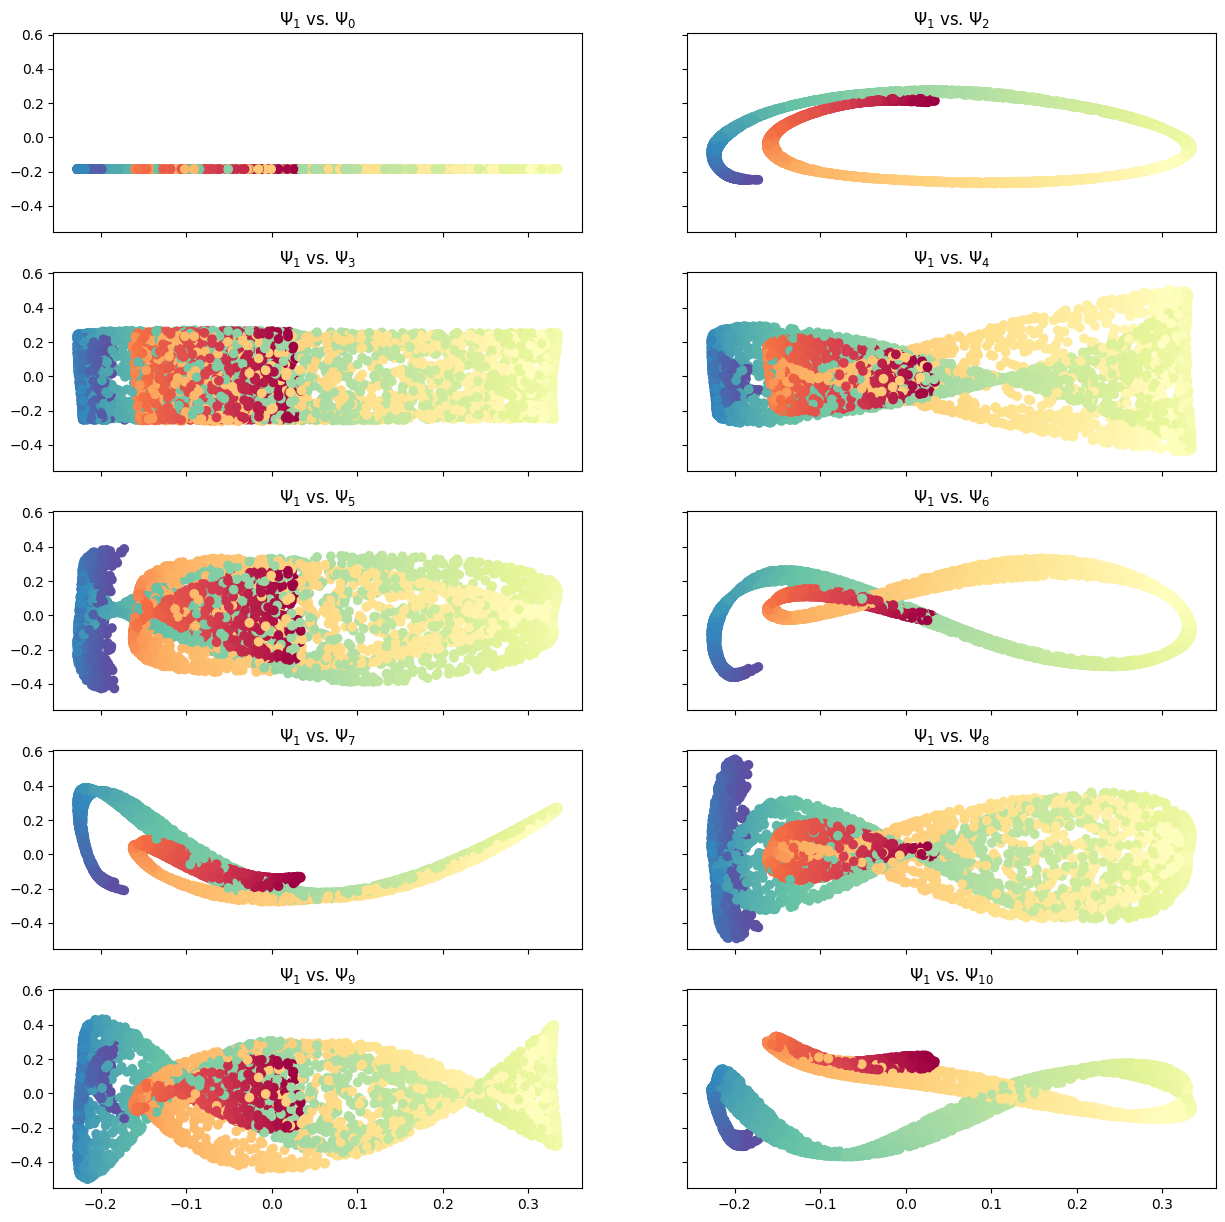

In [17]:

plot_pairwise_eigenvector(
    eigenvectors=eigenvectors,  # Use all eigenvectors directly
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color),  # Use color for all points
)


In [11]:
# Automatic Embedding Selection
selection = LocalRegressionSelection(intrinsic_dim=2, n_subsample=500, strategy="dim").fit(eigenvectors)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

# Transforming the eigenvectors using the selection
target_mapping = selection.transform(eigenvectors)

Found parsimonious eigenvectors (indices): [1 3]


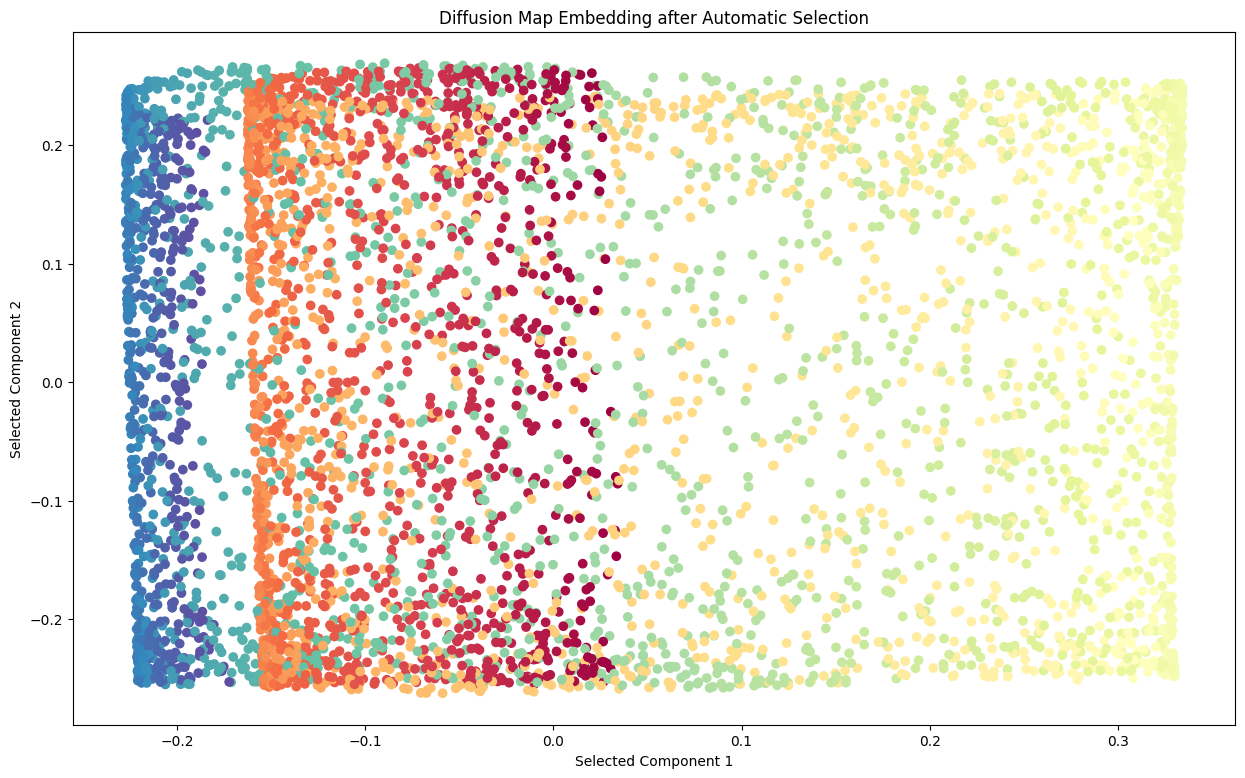

In [12]:
# Visualization of the selected embedding
f, ax = plt.subplots(figsize=(15, 9))
idx_plot = range(X.shape[0])  # Assuming you want to plot all points
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_title('Diffusion Map Embedding after Automatic Selection')
ax.set_xlabel('Selected Component 1')
ax.set_ylabel('Selected Component 2')
plt.show()